<a href="https://colab.research.google.com/github/elisaulperez/CUFICO-2018-2/blob/master/Elisaul_TTreeExcercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, test ROOT installation with a simple example

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [0]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
libxext-dev is already the newest version (2:1.3.3-1).
libxft-dev is already the newest version (2.3.2-1).
libxpm-dev is already the newest version (1:3.5.12-1).
subversion is already the newest version (1.9.7-4ubuntu1).
binutils is already the newest version (2.30-21ubuntu1~18.04).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.1).
g++ is already the newest version (4:7.3.0-3ubuntu2.1).
gcc is already the newest version (4:7.3.0-3ubuntu2.1).
gfortran is already the newest version (4:7.3.0-3ubuntu2.1).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.1).
tar is already the newest version (1.29b-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


### 2. Mount the drive to get the root binary and untar it 

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Team Drives/PyROOT_in_Google/"

BasicAnalysis.ipynb	  HistogrammingInROOT.ipynb    TrimmedTree.root
BasicPyROOTExample.ipynb  root_build_google_yikes.tar  TTreeExcercise.ipynb


In [0]:
!tar -xf /content/drive/Team\ Drives/PyROOT_in_Google/root_build_google_yikes.tar

In [0]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20 23:35 root_build
drwxr-xr-x  1 root root 4.0K Feb 19 17:17 sample_data
drwx------  4 root root 4.0K Feb 27 00:55 drive



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [0]:
import ROOT

In [0]:
from array import array

In [0]:
MyTree = ROOT.TTree( 'tree1', 'tree para un par de dados' )

In [0]:
x = array( 'f', [ 0 ] )
y = array( 'f', [ 0 ] )
z = array( 'f', [ 0 ] )

In [0]:
MyTree.Branch( 'dado1', x, 'dado1/F' )
MyTree.Branch( 'dado2', y, 'dado2/F' )
MyTree.Branch( 'dado3', z, 'dado3/F' )

<ROOT.TBranch object ("dado3") at 0x359e080>

In [0]:
from random import randint
from random import gauss
from math import floor

In [0]:
for i in range(10000):
  x[0] = gauss(5,2)
  y[0] = gauss(5,3)
  z[0] =randint(1,10)
  MyTree.Fill()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


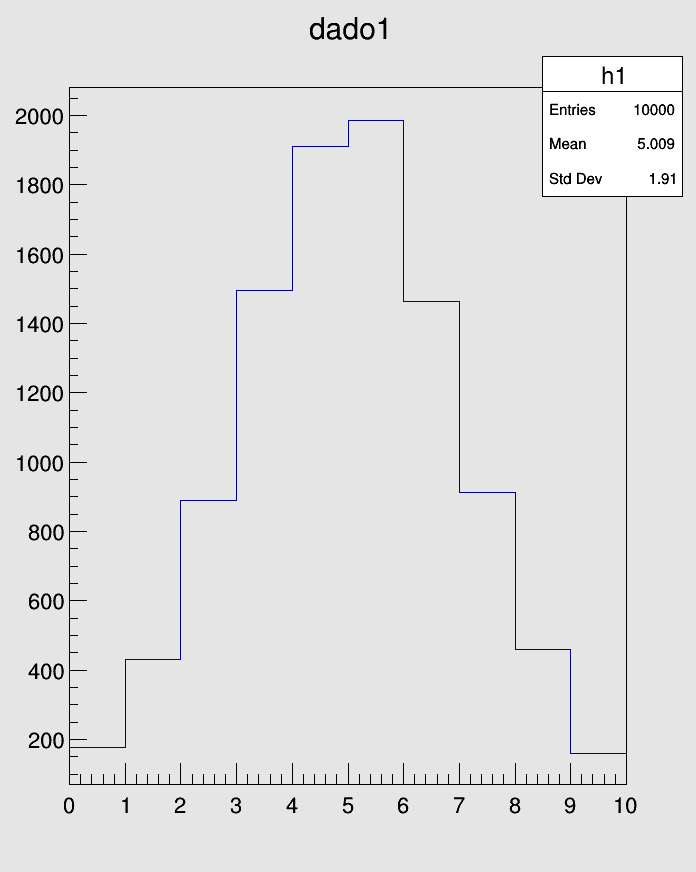

In [0]:
c1 = ROOT.TCanvas( 'c1', 'My First Data example', 200, 10, 700, 900 )
c1.SetFillColor( 18 )
MyTree.Draw("dado1>>h1(10,0,10)")
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

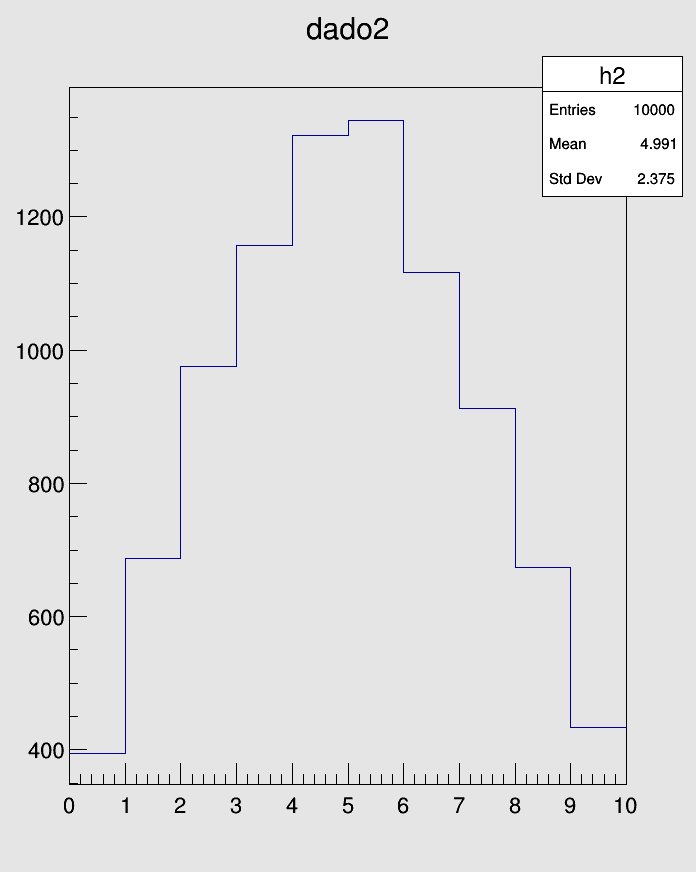

In [0]:
MyTree.Draw("dado2>>h2(10,0,10)")
c1.Update()
gROOT.GetListOfCanvases().Draw()

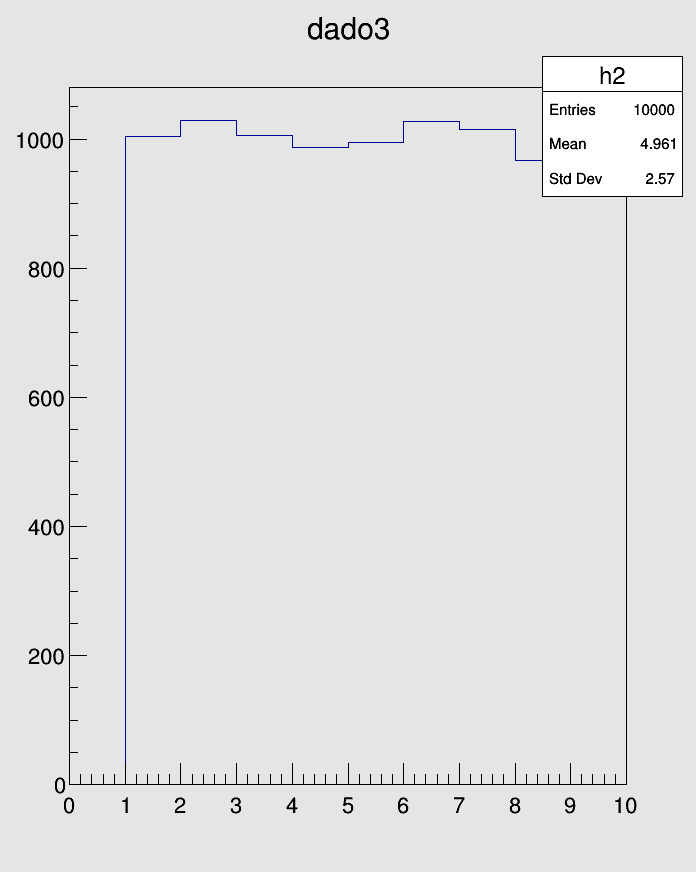

In [0]:
MyTree.Draw("dado3>>h2(10,0,10)")
c1.Update()
gROOT.GetListOfCanvases().Draw()

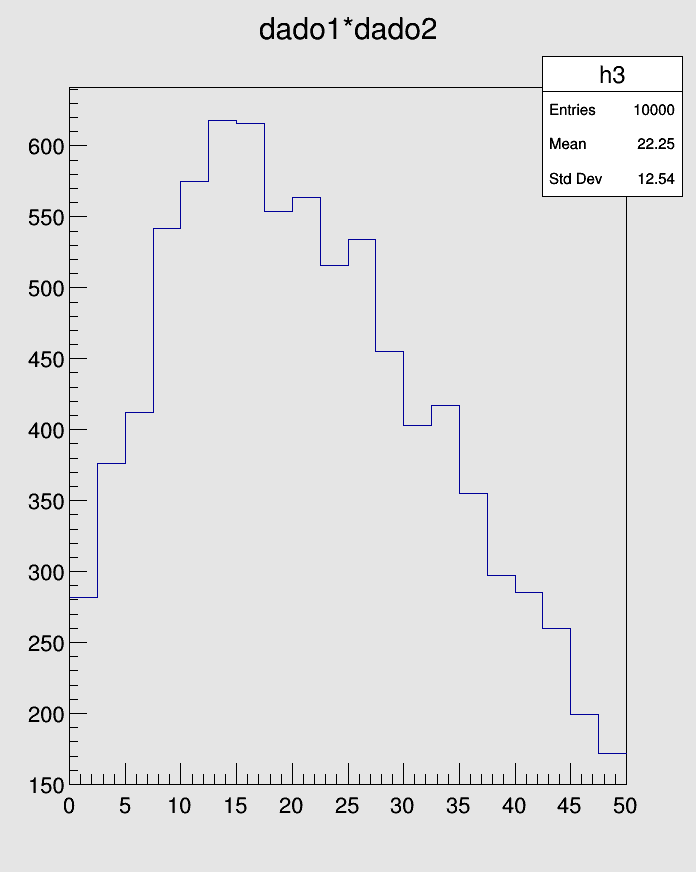

In [0]:
MyTree.Draw("dado1*dado2>>h3(20,0,50)")
c1.Update()
gROOT.GetListOfCanvases().Draw()

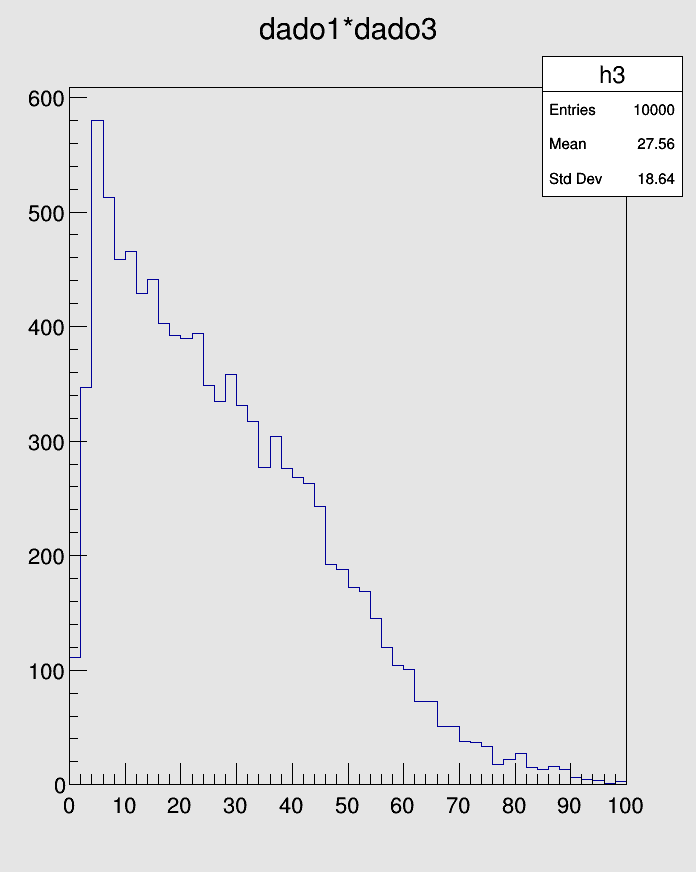

In [0]:
MyTree.Draw("dado1*dado3>>h3(50,0,100)")
c1.Update()
gROOT.GetListOfCanvases().Draw()

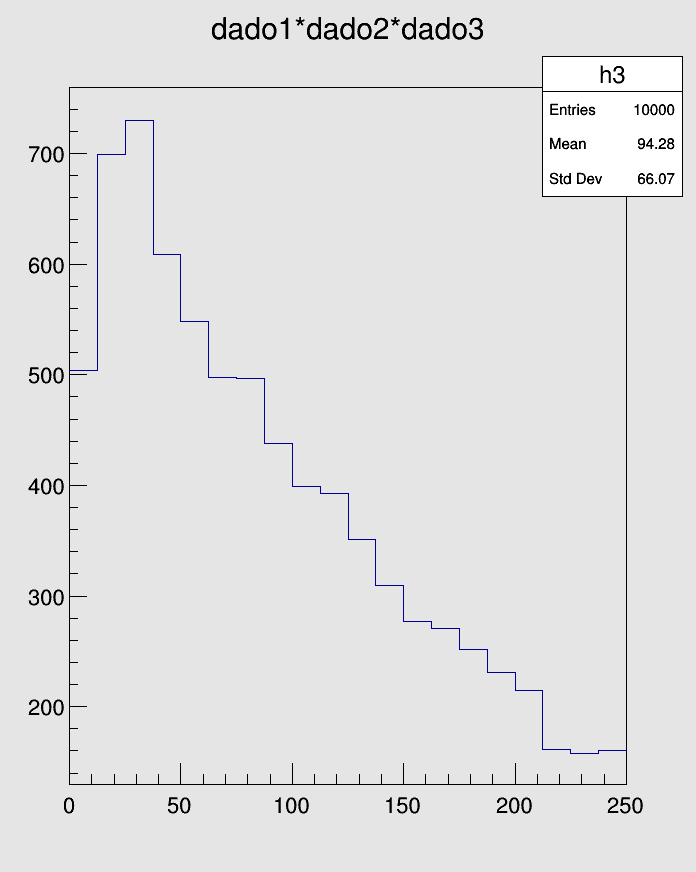

In [0]:
MyTree.Draw("dado1*dado2*dado3>>h3(20,0,250)")
c1.Update()
gROOT.GetListOfCanvases().Draw()

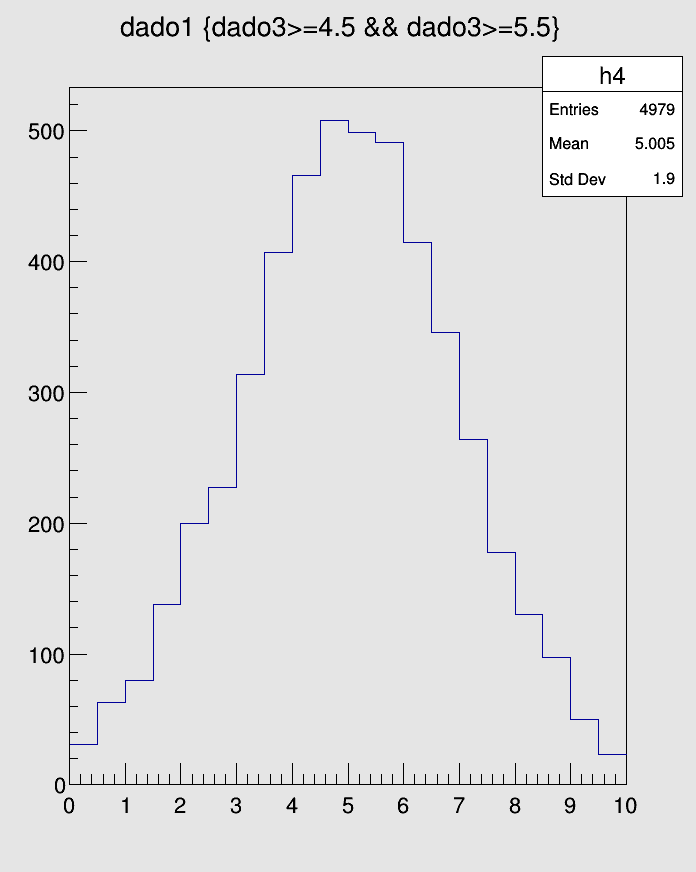

In [0]:
MyTree.Draw("dado1>>h4(20,0,10)","dado3>=4.5 && dado3>=5.5")
c1.Update()
gROOT.GetListOfCanvases().Draw()

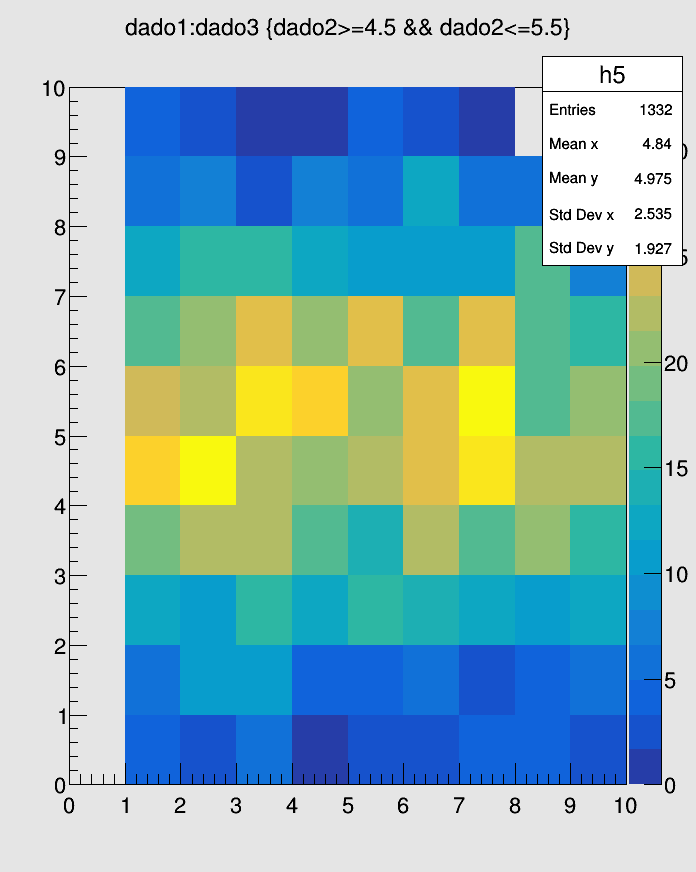

In [0]:
MyTree.Draw("dado1:dado3>>h5(10,0,10,10,0,10)","dado2>=4.5 && dado2<=5.5","colz")
c1.Update()
gROOT.GetListOfCanvases().Draw()

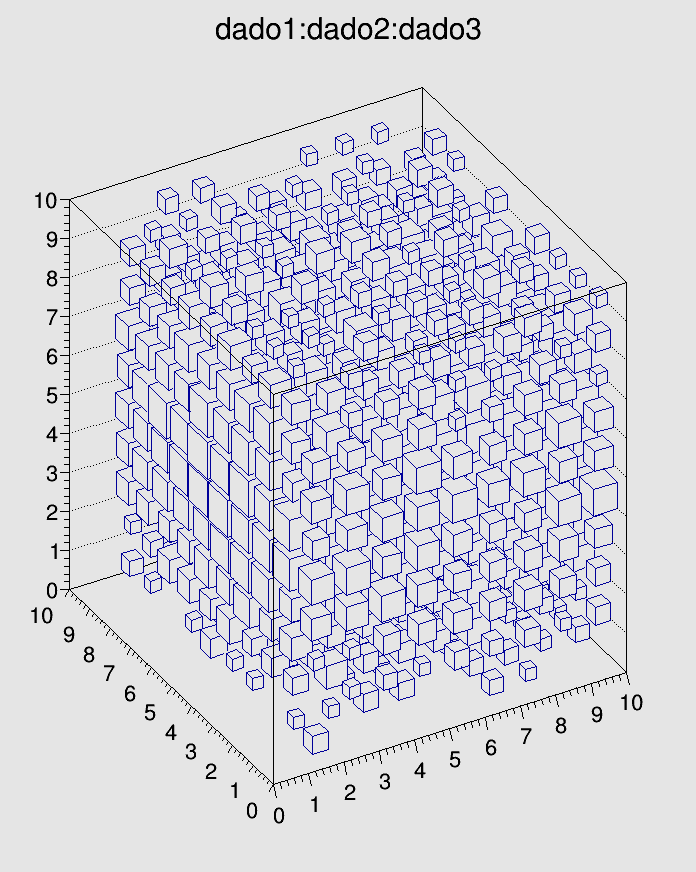

In [0]:
MyTree.Draw("dado1:dado2:dado3>>h5(10,0,10,10,0,10,10,0,10)","","lego")
c1.Update()
gROOT.GetListOfCanvases().Draw()